In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading Files

In [5]:
data_game = pd.read_csv("./games.csv")
print("games.csv shape is ", data_game.shape)
print(data_game.head())
print( )

# data_user = pd.read_csv("./users.csv")
# print("users.csv shape is ", data_user.shape)
# print(data_user.head())
# print( )

# data_rec = pd.read_csv("./recommendations.csv")
# print("recommendations.csv shape is ", data_rec.shape)
# print(data_rec.head())
# print( )

games.csv shape is  (50872, 13)
   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   dis

# Draw Plots

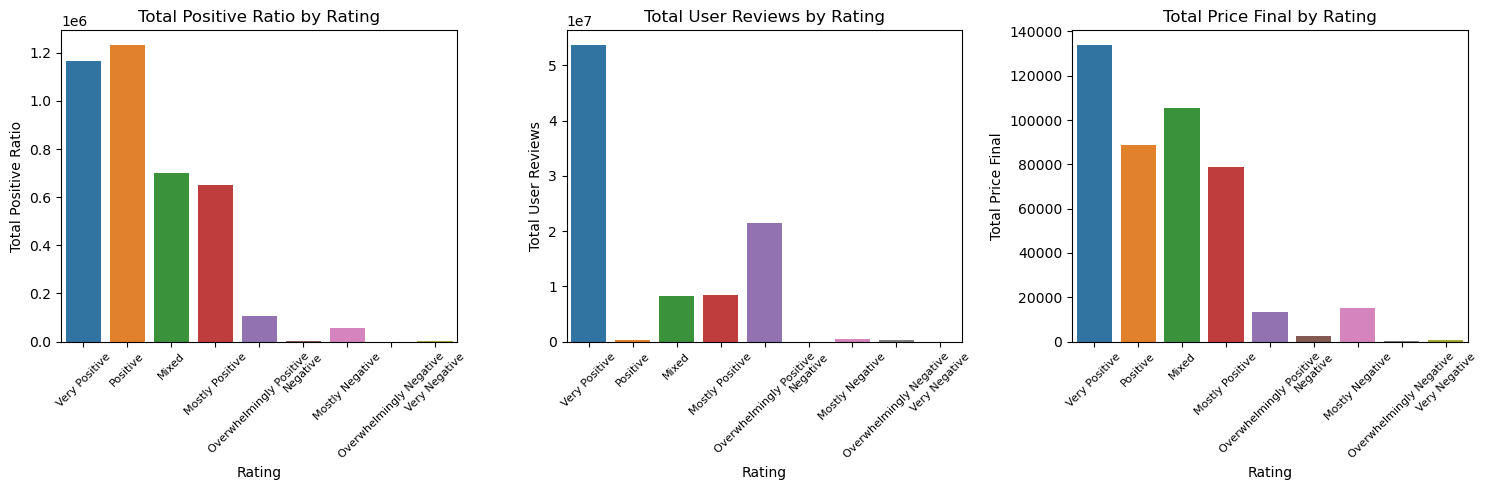

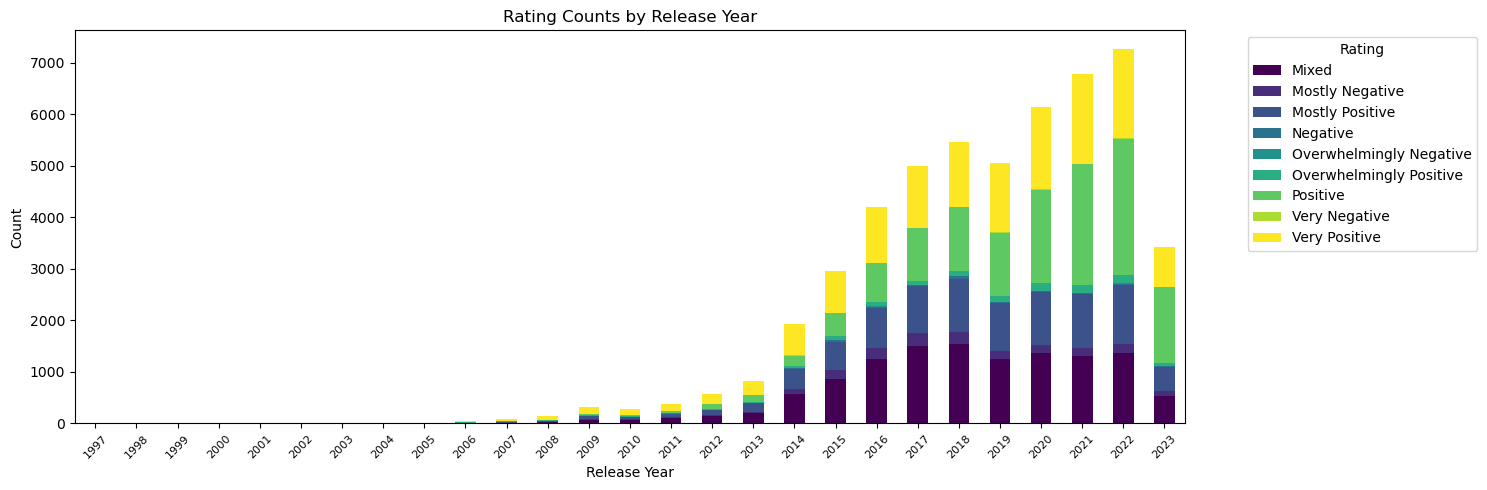

In [6]:
data_game['date_release'] = pd.to_datetime(data_game['date_release'], errors='coerce')
# data_rec['date'] = pd.to_datetime(data_rec['date'], errors='coerce')

# Positive Ratio 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='rating', y='positive_ratio', data=data_game, estimator=sum, ci=None)
plt.title('Total Positive Ratio by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Positive Ratio')
plt.xticks(rotation=45, fontsize=8)

# User Reviews
plt.subplot(1, 3, 2)
sns.barplot(x='rating', y='user_reviews', data=data_game, estimator=sum, ci=None)
plt.title('Total User Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Total User Reviews')
plt.xticks(rotation=45, fontsize=8)

# Price Final
plt.subplot(1, 3, 3)
sns.barplot(x='rating', y='price_final', data=data_game, estimator=sum, ci=None)
plt.title('Total Price Final by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Price Final')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# Releasing year
data_game['release_year'] = data_game['date_release'].dt.year
yearly_rating_counts = data_game.groupby(['release_year', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(15, 5))
yearly_rating_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Rating Counts by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# Clear Data set


In [7]:
data_game = data_game.dropna()
data_user = data_user.dropna()
data_rec = data_rec.dropna()

# Save first 5000 rows of recommendations

In [8]:
# rec_5000 = data_rec.head(5000)
# rec_5000.to_csv('recommendations_5000.csv', index=False)


# data_user.to_csv('users_cleaned.csv', index=False)
# rec_5000.to_csv('recommendations_cleaned_5000.csv', index=False)

# Adding Features

In [9]:
data_game['release_year'] = pd.to_datetime(data_game['date_release']).dt.year
data_game['release_month'] = pd.to_datetime(data_game['date_release']).dt.month

data_game.to_csv('games_cleaned.csv', index=False)

In [10]:
def platform_to_number(row):
    if row['win'] == 1 and row['mac'] == 1 and row['linux'] == 1:
        return 7  
    elif row['win'] == 1 and row['mac'] == 1:
        return 6  
    elif row['win'] == 1 and row['linux'] == 1:
        return 5  
    elif row['mac'] == 1 and row['linux'] == 1:
        return 4  
    elif row['win'] == 1:
        return 3 
    elif row['mac'] == 1:
        return 2  
    elif row['linux'] == 1:
        return 1  
    else:
        return 0



# Split Data set

In [11]:
games_cleaned = pd.read_csv('games_cleaned.csv')
# users_cleaned = pd.read_csv('users_cleaned.csv')
# recommendations_cleaned = pd.read_csv('recommendations_cleaned_5000.csv')

games_train, games_test = train_test_split(games_cleaned, test_size=0.3, random_state=42)
# users_train, users_test = train_test_split(users_cleaned, test_size=0.3, random_state=42)
# recommendations_train, recommendations_test = train_test_split(recommendations_cleaned, test_size=0.3, random_state=42)

games_train['platform_support'] = games_train.apply(platform_to_number, axis=1)
games_test['platform_support'] = games_test.apply(platform_to_number, axis=1)

games_train.to_csv('games_train.csv', index=False)
games_test.to_csv('games_test.csv', index=False)
# users_train.to_csv('users_train.csv', index=False)
# users_test.to_csv('users_test.csv', index=False)
# recommendations_train.to_csv('recommendations_train.csv', index=False)
# recommendations_test.to_csv('recommendations_test.csv', index=False)

print("Data splitting and file saving completed.")

Data splitting and file saving completed.


# Feature Selection

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [13]:
features = ['positive_ratio', 'user_reviews', 
             'platform_support',
            'release_year', 'release_month',
            'price_final', 'price_original']
target = 'rating'

In [14]:
games_train = pd.read_csv('games_train.csv')
games_test = pd.read_csv('games_test.csv')
# recommendations_train = pd.read_csv('recommendations_train.csv')
# recommendations_test = pd.read_csv('recommendations_test.csv')

rating_mapping = {
    'Very Positive': 5,
    'Positive': 4,
    'Mixed': 3,
    'Negative': 2,
    'Very Negative': 1
}

games_train['rating'] = games_train['rating'].map(rating_mapping)
games_test['rating'] = games_test['rating'].map(rating_mapping)


In [15]:
print(games_train.head())
print(games_test.head())

    app_id                          title date_release   win    mac  linux  \
0  1306790       Putin kills: Coronavirus   2020-06-15  True  False  False   
1   359650  Star Trek™ : 25th Anniversary   2015-05-07  True  False  False   
2  1573160                   JUST DEFENSE   2021-03-25  True  False  False   
3   496102    3DMark Night Raid benchmark   2018-10-08  True  False  False   
4  1505440                   Neon Warrior   2021-03-02  True  False  False   

   rating  positive_ratio  user_reviews  price_final  price_original  \
0     5.0              81           107         0.28            0.99   
1     5.0              90           112         9.99            9.99   
2     4.0              83            12         0.00            0.00   
3     4.0              96            28        34.99            0.00   
4     4.0              90            11         1.19           11.99   

   discount  steam_deck  release_year  release_month  platform_support  
0      71.0        True  

In [16]:
games_train = games_train.dropna()
games_test = games_test.dropna()

In [17]:
X_train = games_train[features]
X_test = games_test[features]
y_train = games_train[target]
y_test = games_test[target]

# Model Creation

In [18]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('win_mac_linux', OneHotEncoder(handle_unknown='ignore'), ['win', 'mac', 'linux'])
#     ],
#     remainder='passthrough'
# )

# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("model predict finish")

model predict finish


# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2708549142644269


In [20]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']